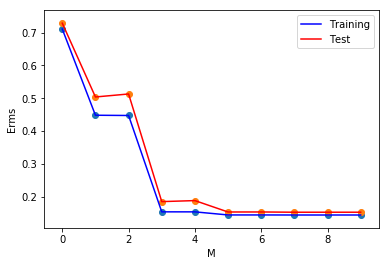

In [1]:
#import needed libraries
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import math
import cmath

test_g = np.random.normal(0,.15,100)
train_g = np.random.normal(0,.15,100)
def ERMS(m):
    M = m # model order
    #Generate data of training
    #In this script. I creat 100 number of data in sine curve function.
    #Gaussian noise genrate
    g1 = train_g #(location, scale, Number of data)
    x = np.arange(0,1,0.01) #Range of x from 0 to 1
    t = np.sin(2*math.pi*x)       # training t
    train_t = np.sin(2*math.pi*x)+g1    # training t with gaussian
    g2 = test_g
    X = np.array([x**m for m in range(M+1)]).T # X of training data
    Z = X.T@X
    w = np.linalg.inv(Z)@X.T@t # weight
    # test set
    test_data = np.arange(0.05,1.05,0.01)
    test_t = np.sin(2*math.pi*test_data)+g2 # test t
    X_test_data = np.array([test_data**m for m in range(w.size)]).T # X of test data
    test_ERMS = abs(cmath.sqrt((np.linalg.norm((w.T@X_test_data.T-test_t.T))**2)/100))
    train_predict_curve = X@w  #training curve
    train_ERMS = abs(cmath.sqrt((np.linalg.norm((train_predict_curve-train_t))**2)/100))
    return test_ERMS,train_ERMS

m = int(input('m='))
Erms = np.array([ERMS(m) for m in range(m)])
x = np.arange(0,m,1)
p1 = plt.plot(x,Erms[:,1],'b')
p2 = plt.plot(x,Erms[:,0],'r')
plt.scatter(x,Erms[:,1])
plt.scatter(x,Erms[:,0])
plt.xlabel('M')
plt.ylabel('Erms')
plt.rcParams["axes.titlesize"] = 16
plt.legend((p1[0],p2[0]),('Training', 'Test'), fontsize=10)